Now we will plot the energy values of the simulation performed with different bases and different optimizers. Since we parallelized the program with respect to the distances, it may happen that a process finished before another one that started before, i.e. we may find the energies in the wrong order in the file

In [183]:
import os

# List of input file paths
file_paths_LiH = [
    '/home/tommi/venvs/outputLiH/results_LiH_sto3g_parity_SLSQP_22-6-2025_16_6_31.txt',
    '/home/tommi/venvs/outputLiH/results_LiH_321g_parity_SLSQP_22-6-2025_16_6_31.txt',
    '/home/tommi/venvs/outputLiH/results_LiH_631g_parity_SLSQP_22-6-2025_16_6_31.txt',
    '/home/tommi/venvs/outputLiH/results_LiH_ccpvtz_parity_SLSQP_22-6-2025_16_6_31.txt',
    '/home/tommi/venvs/outputLiH/results_LiH_sto3g_parity_ADAM_22-6-2025_16_44_20.txt',
    '/home/tommi/venvs/outputLiH/results_LiH_321g_parity_ADAM_22-6-2025_16_44_20.txt',
    '/home/tommi/venvs/outputLiH/results_LiH_631g_parity_ADAM_22-6-2025_16_44_20.txt',
    '/home/tommi/venvs/outputLiH/results_LiH_ccpvtz_parity_ADAM_22-6-2025_16_44_20.txt'
]

for path in file_paths_LiH:
    with open(path, 'r') as f:
        lines = f.readlines()

    # Keep header or malformed lines separately if needed
    valid_lines = []
    header_lines = []

    for line in lines:
        tokens = line.split()
        if len(tokens) == 0:
            header_lines.append(line)
            continue
        elif tokens[0] == 'Total':
            header_lines.append(line.rstrip() + '\n')
            continue
        try:
            float(tokens[0])  # Validate first token is a number
            valid_lines.append(line)
        except ValueError:
            header_lines.append(line)

    # Sort valid lines by the first token (converted to float)
    sorted_lines = sorted(valid_lines, key = lambda line: float(line.split()[0]))

    # Combine with headers (on top)
    final_lines = header_lines + sorted_lines

    # Output file path
    new_path = path.replace('.txt', '_sorted.txt')

    # Write to new file
    # with open(new_path, 'w') as f:
    #     f.writelines(final_lines)

    # print(f"Sorted file written to: {new_path}")

    with open(path, 'w') as f:
        f.writelines(final_lines)

    print(f"Sorted file written to: {path}")


Sorted file written to: /home/tommi/venvs/outputLiH/results_LiH_sto3g_parity_SLSQP_22-6-2025_16_6_31.txt
Sorted file written to: /home/tommi/venvs/outputLiH/results_LiH_321g_parity_SLSQP_22-6-2025_16_6_31.txt
Sorted file written to: /home/tommi/venvs/outputLiH/results_LiH_631g_parity_SLSQP_22-6-2025_16_6_31.txt
Sorted file written to: /home/tommi/venvs/outputLiH/results_LiH_ccpvtz_parity_SLSQP_22-6-2025_16_6_31.txt
Sorted file written to: /home/tommi/venvs/outputLiH/results_LiH_sto3g_parity_ADAM_22-6-2025_16_44_20.txt
Sorted file written to: /home/tommi/venvs/outputLiH/results_LiH_321g_parity_ADAM_22-6-2025_16_44_20.txt
Sorted file written to: /home/tommi/venvs/outputLiH/results_LiH_631g_parity_ADAM_22-6-2025_16_44_20.txt
Sorted file written to: /home/tommi/venvs/outputLiH/results_LiH_ccpvtz_parity_ADAM_22-6-2025_16_44_20.txt


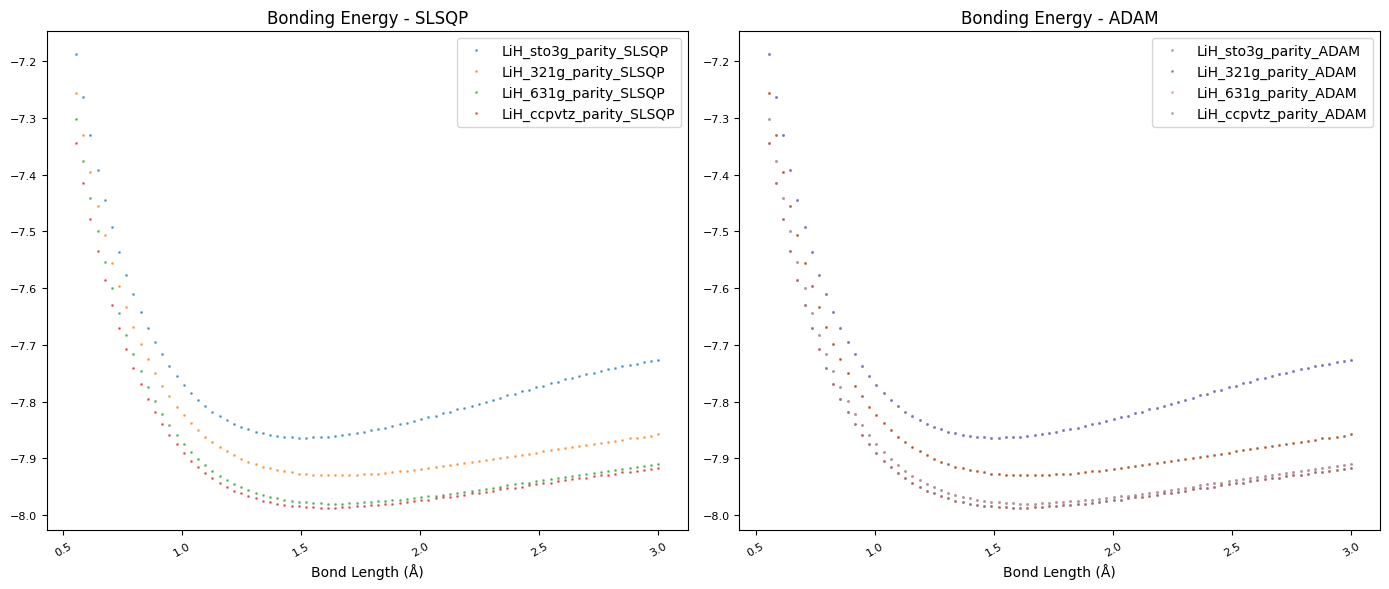

In [184]:
import matplotlib.pyplot as plt
import os

energies_LiH = {}
q_eigenval_LiH = {}
c_eigenval_LiH = {}
distances_LiH = {}

# Parse data from each file
for path in file_paths_LiH[0:4]:
    filename = os.path.basename(path)
    
    # Extract basis from filename (assumes format: results_<basis>_<mapper>_<time>.txt)
    parts     = filename.split('_')
    molecule  = parts[1]
    basis     = parts[2]
    mapper    = parts[3]
    optimizer = parts[4]

    key = molecule + '_' + basis  + '_' + mapper + '_' + optimizer

    energies_LiH[key] = []
    q_eigenval_LiH[key] = []
    c_eigenval_LiH[key] = []
    distances_LiH[key] = []

    with open(path, 'r') as file:
        for line in file:
            tokens = line.split()
            if len(tokens) > 4 and tokens[0] != 'Total':
                try:
                    distances_LiH[key].append(float(tokens[0]))
                    energies_LiH[key].append(round(float(tokens[5]), 3))
                    q_eigenval_LiH[key].append(round(float(tokens[7]), 3))
                    c_eigenval_LiH[key].append(round(float(tokens[11]), 3))

                except ValueError:
                    continue  # skip invalid lines

# Plotting
fig, axes = plt.subplots(1, 2, figsize = (14, 6))
for basis in energies_LiH:
    skip = 17
    d = distances_LiH[basis][skip:]
    e = energies_LiH[basis][skip:]
    axes[0].plot(d, e, 'o', markersize = 1, alpha = 0.6, label = f'{basis}')

axes[0].set_title("Bonding Energy - SLSQP")
axes[0].set_xlabel("Bond Length (Å)")
axes[0].tick_params(axis = 'x', rotation = 30, labelsize = 8)
axes[0].tick_params(axis = 'y', labelsize = 8)
axes[0].legend()
plt.tight_layout()

for path in file_paths_LiH[4:8]:
    filename = os.path.basename(path)
    
    # Extract basis from filename (assumes format: results_<basis>_<mapper>_<time>.txt)
    parts     = filename.split('_')
    molecule  = parts[1]
    basis     = parts[2]
    mapper    = parts[3]
    optimizer = parts[4]

    key = molecule + '_' + basis  + '_' + mapper + '_' + optimizer

    energies_LiH[key] = []
    q_eigenval_LiH[key] = []
    c_eigenval_LiH[key] = []
    distances_LiH[key] = []

    with open(path, 'r') as file:
        for line in file:
            tokens = line.split()
            if len(tokens) > 4 and tokens[0] != 'Total':
                try:
                    distances_LiH[key].append(float(tokens[0]))
                    energies_LiH[key].append(round(float(tokens[5]), 3))
                    q_eigenval_LiH[key].append(round(float(tokens[7]), 3))
                    c_eigenval_LiH[key].append(round(float(tokens[11]), 3))

                except ValueError:
                    continue  # skip invalid lines

# Plotting
for basis in energies_LiH:
    skip = 17
    d = distances_LiH[basis][skip:]
    e = energies_LiH[basis][skip:]
    axes[1].plot(d, e, 'o', markersize = 1, alpha = 0.6, label = f'{basis}')

axes[1].set_title("Bonding Energy - ADAM")
axes[1].set_xlabel("Bond Length (Å)")
axes[1].tick_params(axis = 'x', rotation = 30, labelsize = 8)
axes[1].tick_params(axis = 'y', labelsize = 8)
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles[4:], labels[4:])
plt.tight_layout()
plt.show()


Collecting Li2 and H2 energies at high distance (1e4)

In [185]:
import os

# List of input file paths
file_paths_Li2H2 = [
    '/home/tommi/venvs/outputLi2H2/results_H2_sto3g_parity_SLSQP_26-6-2025_10_58_20.txt',
    '/home/tommi/venvs/outputLi2H2/results_H2_321g_parity_SLSQP_26-6-2025_10_58_20.txt',
    '/home/tommi/venvs/outputLi2H2/results_H2_631g_parity_SLSQP_26-6-2025_10_58_20.txt',
    '/home/tommi/venvs/outputLi2H2/results_H2_ccpvtz_parity_SLSQP_26-6-2025_10_58_20.txt',
    '/home/tommi/venvs/outputLi2H2/results_Li2_sto3g_parity_SLSQP_26-6-2025_10_57_59.txt',
    '/home/tommi/venvs/outputLi2H2/results_Li2_321g_parity_SLSQP_26-6-2025_10_57_59.txt',
    '/home/tommi/venvs/outputLi2H2/results_Li2_631g_parity_SLSQP_26-6-2025_10_57_59.txt',
    '/home/tommi/venvs/outputLi2H2/results_Li2_ccpvtz_parity_SLSQP_26-6-2025_10_57_59.txt'
]

energies_Li2H2 = {}
q_eigenval_Li2H2 = {}
c_eigenval_Li2H2 = {}
for path in file_paths_Li2H2:
    filename = os.path.basename(path)
    
    # Extract basis from filename (assumes format: results_<basis>_<mapper>_<time>.txt)
    parts     = filename.split('_')
    molecule  = parts[1]
    basis     = parts[2]
    mapper    = parts[3]
    optimizer = parts[4]

    key =  molecule + '_' + basis  + '_' + mapper + '_' + optimizer

    energies_Li2H2[key] = 0
    q_eigenval_Li2H2[key] = 0
    c_eigenval_Li2H2[key] = 0

    with open(path, 'r') as file:
        for line in file:
            tokens = line.split()
            if len(tokens) > 4 and tokens[0] != 'Total':
                try:
                    energies_Li2H2[key] = round(float(tokens[2]), 5)
                    q_eigenval_Li2H2[key] = round(float(tokens[4].rstrip(')')), 5)
                    c_eigenval_Li2H2[key] = round(float(tokens[8].strip('+j0)').lstrip('(')), 5)

                except ValueError:
                    continue  # skip invalid lines

# print(energies_Li2H2, q_eigenval_Li2H2, c_eigenval_Li2H2)


Calculation of H and Li ground state, i.e. division by 2 of the previously fetched values

In [186]:
gs_energy = {}

for key in energies_Li2H2:
    gs_energy[key] = energies_Li2H2[key] / 2

print(gs_energy)

{'H2_sto3g_parity_SLSQP': -0.46658, 'H2_321g_parity_SLSQP': -0.487135, 'H2_631g_parity_SLSQP': -0.488125, 'H2_ccpvtz_parity_SLSQP': -0.48405, 'Li2_sto3g_parity_SLSQP': -7.182825, 'Li2_321g_parity_SLSQP': -7.37797, 'Li2_631g_parity_SLSQP': -7.32197, 'Li2_ccpvtz_parity_SLSQP': -7.32731}


Now we have found the ground state of the single atoms. Theoretically, the sum of the single atom energies is higher than the molecule energy. Let's see if this is the case. In order to simplify the analysis, we are creating a new dictionary where each key is a basis and the elements are the the H2 and Li2

In [187]:
energy_dict = {}
for key in gs_energy:
    parts = key.split('_')

    # creating a dictionary where each key is a basis
    if parts[1] not in energy_dict:
        energy_dict[parts[1]] = {'H2': 0, 'Li2': 0}

    if energy_dict[parts[1]][parts[0]] == 0:
        energy_dict[parts[1]][parts[0]] = gs_energy[key]

print(energy_dict)


{'sto3g': {'H2': -0.46658, 'Li2': -7.182825}, '321g': {'H2': -0.487135, 'Li2': -7.37797}, '631g': {'H2': -0.488125, 'Li2': -7.32197}, 'ccpvtz': {'H2': -0.48405, 'Li2': -7.32731}}


Let's now sum the energy associated to each basis atom and see if it is lower than the molecule LiH (we will compare these values with the minimum of the curve previously obtained)

In [205]:
import numpy as np

en_min_LiH = {}
for key in energies_LiH:
    parts = key.split('_')

    # creating a dictionary where each key is a basis
    if parts[3] == 'SLSQP':
        en_min_LiH[parts[1]] = energies_LiH[key]

min_vals = {}
for key in en_min_LiH:
    min_val = min(en_min_LiH[key])

    idx = en_min_LiH[key].index(min_val)
    # print(idx)

    min_vals[key] = (min_val, idx)

# print(min_vals)

energy_sum = {}
for key in energy_dict:
    if key not in energy_sum:
        energy_sum[key] = sum(energy_dict[key].values())

# print(energy_sum)

start = 0.01
end = 3
steps = 100
d = np.linspace(start, end, steps)
for key in energy_sum:
    if energy_sum[key] > min_vals[key][0]: print(f'{energy_sum[key]} < {min_vals[key]}, {d[min_vals[key][1]]} Å')


-7.649405 < (-7.864, 48), 1.45969696969697 Å
-7.865105000000001 < (-7.93, 52), 1.5805050505050506 Å
-7.8100950000000005 < (-7.98, 52), 1.5805050505050506 Å
-7.81136 < (-7.987, 51), 1.5503030303030305 Å


where the index printed are the position in the list where the minimum lies (such index is used to find the distance between the atoms).

We have obtained that, whatever the basis used for the simulation, the overall molecule is more stable (i.e. ground state has lower energy) than the two atoms isolated. The binding energy is defined as the difference between the ground state between the two atoms and the molecule

In [196]:
binding_en = {}
for key in energy_sum:
    if key not in binding_en:
        binding_en[key] = energy_sum[key] - en_min_LiH[key][0]

print(binding_en)

{'sto3g': 0.2145950000000001, '321g': 0.06489499999999904, '631g': 0.16990499999999997, 'ccpvtz': 0.17564000000000046}


Since the scientific [reference](https://indico.in2p3.fr/event/2481/contributions/24469/attachments/19766/24292/ID_72_poster_A0.pdf) we have is checking at the distance of 1.64 Å, let us see at that length how the energy behaves

In [227]:
# print(d)

d_round = np.round(d, 2)
# print(d_round)

val = 1.64
idx = np.where(d_round == val)[0]
print(idx)

for key in en_min_LiH:
    print(en_min_LiH[key][idx[0]])

[54]
-7.859
-7.93
-7.98
-7.986


We can see that the values are essentially coincident with the ones found with the min() function. In fact, the index changes just by 3 or 4 digits